<a href="https://colab.research.google.com/github/arnav0804/ML-Practice-Experiments-1-4/blob/main/ML_Practice_Experiments_5_to_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-Means inertia: 78.85566582597727
K-Means silhouette: 0.551191604619592


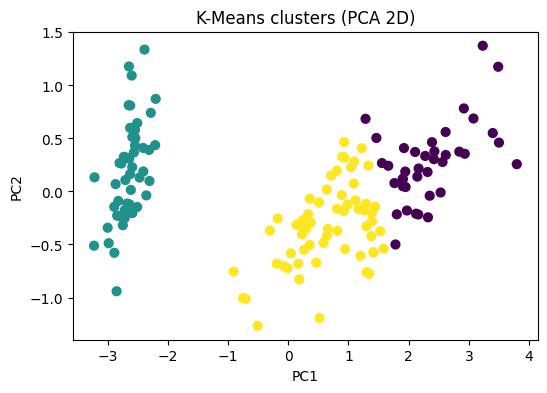

GMM converged: True
GMM silhouette: 0.5011761635067206


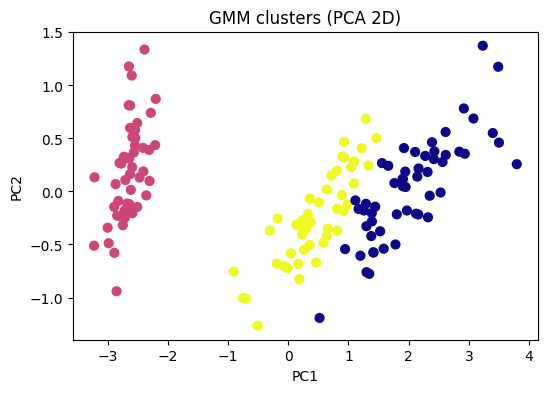

Agglomerative silhouette: 0.5543236611296419


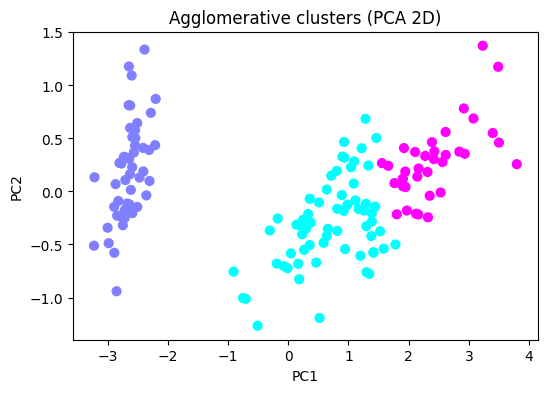

Adjusted Rand Index (KMeans vs True): 0.7163421126838476
Adjusted Rand Index (GMM vs True): 0.9038742317748124
Adjusted Rand Index (Agglomerative vs True): 0.7311985567707746


In [1]:
# Experiment 5: K-means, Gaussian Mixture Model (GMM), Hierarchical clustering (Iris dataset)

from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load data
iris = load_iris()
X = iris.data
feature_names = iris.feature_names

# Use PCA to reduce to 2D for plotting
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X)

# ----- 1) K-Means -----
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

print("K-Means inertia:", kmeans.inertia_)
print("K-Means silhouette:", silhouette_score(X, kmeans_labels))

# plot
plt.figure(figsize=(6,4))
plt.scatter(X2[:,0], X2[:,1], c=kmeans_labels, cmap='viridis', s=40)
plt.title("K-Means clusters (PCA 2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()

# ----- 2) Gaussian Mixture Model (GMM) -----
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm_labels = gmm.fit_predict(X)
print("GMM converged:", gmm.converged_)
print("GMM silhouette:", silhouette_score(X, gmm_labels))

plt.figure(figsize=(6,4))
plt.scatter(X2[:,0], X2[:,1], c=gmm_labels, cmap='plasma', s=40)
plt.title("GMM clusters (PCA 2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()

# ----- 3) Hierarchical (Agglomerative) Clustering -----
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_labels = agg.fit_predict(X)
print("Agglomerative silhouette:", silhouette_score(X, agg_labels))

plt.figure(figsize=(6,4))
plt.scatter(X2[:,0], X2[:,1], c=agg_labels, cmap='cool', s=40)
plt.title("Agglomerative clusters (PCA 2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()

# Optional: compare to true labels
true_labels = iris.target
from sklearn.metrics import adjusted_rand_score
print("Adjusted Rand Index (KMeans vs True):", adjusted_rand_score(true_labels, kmeans_labels))
print("Adjusted Rand Index (GMM vs True):", adjusted_rand_score(true_labels, gmm_labels))
print("Adjusted Rand Index (Agglomerative vs True):", adjusted_rand_score(true_labels, agg_labels))


Explained variance ratio (each component): [0.92461872 0.05306648 0.01710261 0.00521218]
Cumulative explained variance: [0.92461872 0.97768521 0.99478782 1.        ]


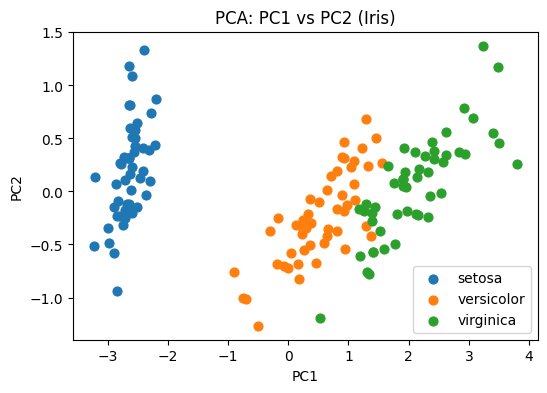


Top loadings (PC1 and PC2):
                         PC1       PC2
sepal length (cm)  0.361387  0.656589
sepal width (cm)  -0.084523  0.730161
petal length (cm)  0.856671 -0.173373
petal width (cm)   0.358289 -0.075481


In [2]:
# Experiment 6: PCA demonstration (Iris dataset) - variance explained and 2D projection

from sklearn.datasets import load_iris
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Fit PCA
pca = PCA(n_components=4, random_state=42)  # keep all components for explained variance
X_pca = pca.fit_transform(X)

# Variance explained
explained = pca.explained_variance_ratio_
print("Explained variance ratio (each component):", explained)
print("Cumulative explained variance:", np.cumsum(explained))

# Plot 2D projection (PC1 vs PC2)
plt.figure(figsize=(6,4))
for lab, name in enumerate(target_names):
    plt.scatter(X_pca[y==lab,0], X_pca[y==lab,1], label=name, s=40)
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.title("PCA: PC1 vs PC2 (Iris)")
plt.legend()
plt.show()

# Show loadings (which original features contribute most to PC1, PC2)
loadings = pca.components_.T  # shape (n_features, n_components)
loadings_df = pd.DataFrame(loadings[:, :2], index=feature_names, columns=['PC1', 'PC2'])
print("\nTop loadings (PC1 and PC2):\n", loadings_df)


In [4]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 kB 12.0 MB/s eta 0:00:00


Converged: True
Transition matrix:
 [[0.89188791 0.10811209]
 [0.1100469  0.8899531 ]]
Means:
 [ 2.99560251 -0.00453441]
Log prob of sequence: -41.92916423761389
Predicted states (first 30): [1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1]


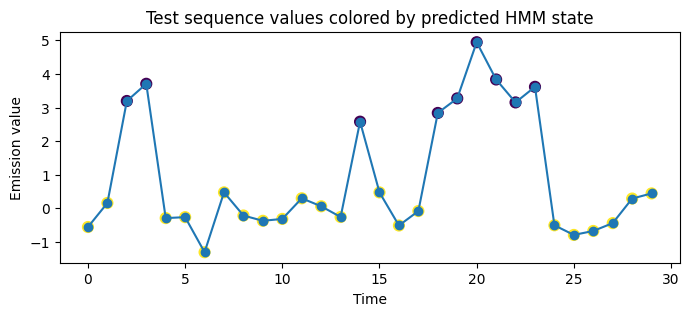

In [5]:
# Experiment 7: HMM (using hmmlearn) - generate synthetic sequences, fit an HMM, decode states
# In Colab run: !pip install hmmlearn
# (uncomment the pip line if running in a fresh environment)

# !pip install hmmlearn

from hmmlearn import hmm
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Create synthetic data: two hidden states, each with different Gaussian emission means
np.random.seed(42)
n_sequences = 50
seq_length = 30

# Define true HMM parameters (for generating data)
# We'll manually generate sequences with segments of state 0 and state 1
sequences = []
lengths = []

for _ in range(n_sequences):
    # create alternating blocks of states
    states = []
    obs = []
    s = 0
    for i in range(seq_length):
        if np.random.rand() < 0.1:  # chance to switch
            s = 1 - s
        states.append(s)
        if s == 0:
            obs.append(np.random.normal(loc=0.0, scale=0.5))  # state 0 emissions
        else:
            obs.append(np.random.normal(loc=3.0, scale=0.7))  # state 1 emissions
    obs = np.array(obs).reshape(-1, 1)
    sequences.append(obs)
    lengths.append(len(obs))

X = np.vstack(sequences)

# Fit a GaussianHMM with 2 states
model = hmm.GaussianHMM(n_components=2, covariance_type='diag', n_iter=200, random_state=42)
model.fit(X, lengths)

print("Converged:", model.monitor_.converged)
print("Transition matrix:\n", model.transmat_)
print("Means:\n", model.means_.ravel())

# Decode (predict) states for one example sequence
test_seq = sequences[0]
logprob, hidden_states = model.decode(test_seq, algorithm="viterbi")
print("Log prob of sequence:", logprob)
print("Predicted states (first 30):", hidden_states)

# Plot emissions + predicted states for the test seq
plt.figure(figsize=(8,3))
plt.plot(test_seq.ravel(), marker='o')
plt.scatter(np.arange(len(test_seq)), test_seq.ravel(), c=hidden_states, cmap='viridis', s=60)
plt.title("Test sequence values colored by predicted HMM state")
plt.xlabel("Time"); plt.ylabel("Emission value")
plt.show()


Accuracy: 0.8947368421052632

Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.80      0.92      0.86        13
   virginica       0.91      0.77      0.83        13

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.90        38
weighted avg       0.90      0.89      0.89        38


Confusion matrix:
 [[12  0  0]
 [ 0 12  1]
 [ 0  3 10]]

Decision rules (text):
 |--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.85
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- sepal length (cm) <= 6.05
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  6.05
|   |   |   |   |--- class: 2
|   |--- petal length (cm) >  4.85
|   |   |--- petal width (cm) <= 1.70
|   |   |   |--- petal length (cm) <= 4.95
|   

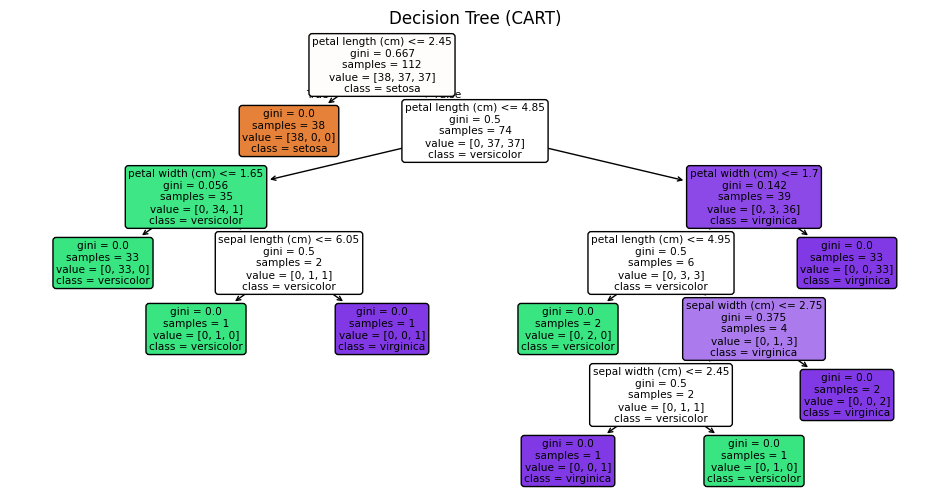

In [6]:
# Experiment 8: Decision Tree (CART) classification on Iris
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data; y = iris.target
feature_names = iris.feature_names; target_names = iris.target_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Train Decision Tree
dt = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)
dt.fit(X_train, y_train)

# Predictions & evaluation
y_pred = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred, target_names=target_names))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

# Print textual tree (rules)
r = export_text(dt, feature_names=feature_names)
print("\nDecision rules (text):\n", r)

# Visualize tree
plt.figure(figsize=(12,6))
plot_tree(dt, feature_names=feature_names, class_names=target_names, filled=True, rounded=True)
plt.title("Decision Tree (CART)")
plt.show()


In [8]:
# Experiment 9: Ensemble learning comparison (Iris)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

iris = load_iris()
X = iris.data; y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

models = {
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'Bagging (DT)': BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results.append((name, acc))
    print(f"---- {name} ----")
    print("Accuracy:", acc)
    print(classification_report(y_test, preds, target_names=iris.target_names))
    print()

# Summary table
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
print("Summary:\n", results_df)

---- DecisionTree ----
Accuracy: 0.8947368421052632
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.80      0.92      0.86        13
   virginica       0.91      0.77      0.83        13

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.90        38
weighted avg       0.90      0.89      0.89        38


---- Bagging (DT) ----
Accuracy: 0.9210526315789473
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38


---- RandomForest ----
Accuracy: 0.9210526315789473
              precision    recall  f1-score   support

      setosa       1.00  